## Data curation, cleaning, ETL

Road the dataset

In [53]:
import pandas as pd

# Read CSV file into a pandas DataFrame
airbnb_df = pd.read_csv('seattle_airbnb.csv')

airbnb_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


Select the feature and label and drop the NA values.

In [54]:
airbnb_features_and_label_df = airbnb_df[["host_response_time", "host_response_rate",
                                "host_is_superhost", "host_total_listings_count",
                                "host_has_profile_pic", "host_identity_verified",
                                "zipcode", "property_type", "room_type", "accommodates", "bathrooms",
                                "bedrooms", "beds", "security_deposit", "cleaning_fee", "guests_included",
                                "extra_people", "minimum_nights", "maximum_nights", "availability_365",
                                "number_of_reviews", "review_scores_rating", "review_scores_cleanliness",
                                "review_scores_checkin", "review_scores_communication", "review_scores_location",
                                "review_scores_value", "instant_bookable", "cancellation_policy",
                                "require_guest_profile_picture", "require_guest_phone_verification", "price"]]

airbnb_features_and_label_df = airbnb_features_and_label_df.dropna()

airbnb_features_and_label_df.head()

,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,zipcode,property_type,room_type,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,price
1,within an hour,98%,t,6.0,t,t,98119,Apartment,Entire home/apt,4,...,10.0,10.0,10.0,10.0,10.0,f,strict,t,t,$150.00
2,within a few hours,67%,f,2.0,t,t,98119,House,Entire home/apt,11,...,10.0,10.0,10.0,10.0,10.0,f,strict,f,f,$975.00
4,within an hour,100%,f,2.0,t,t,98119,House,Entire home/apt,6,...,9.0,10.0,10.0,9.0,9.0,f,strict,f,f,$450.00
7,within an hour,100%,t,5.0,t,t,98119,Cabin,Private room,2,...,10.0,10.0,10.0,9.0,10.0,f,strict,t,t,$60.00
9,within an hour,98%,t,6.0,t,t,98119,Apartment,Entire home/apt,4,...,10.0,10.0,10.0,10.0,9.0,f,strict,t,t,$150.00


- Numerical (clean unit marks): host_response_rate (Need clean %), host_total_listings_count, accommodates, bathrooms, bedrooms, beds, security_deposit (Need clean dollar mark), cleaning_fee (Need clean dollar mark), guests_included, extra_people (Need clean dollar mark), minimum_nights, maximum_nights, availability_365, number_of_reviews, review_scores_rating, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, price (Need clean dollar mark)


- Categorical (One hot): host_response_time, zipcode, property_type, room_type, cancellation_policy


- Binary (t/f to 1/0): host_is_superhost, host_has_profile_pic, host_identity_verified, instant_bookable, require_guest_profile_picture, require_guest_phone_verification

### Cleaning numerical data (remove unit)

In [55]:
# Define a function for cleaning
def clearn_string_and_convert(s):
    s = s.replace("%","")
    s = s.replace("$","")
    s = s.replace(",","")

    converted = float(s)
    return converted

airbnb_features_and_label_df["host_response_rate"] = airbnb_features_and_label_df["host_response_rate"].apply(clearn_string_and_convert)
airbnb_features_and_label_df["security_deposit"] = airbnb_features_and_label_df["security_deposit"].apply(clearn_string_and_convert)
airbnb_features_and_label_df["cleaning_fee"] = airbnb_features_and_label_df["cleaning_fee"].apply(clearn_string_and_convert)
airbnb_features_and_label_df["extra_people"] = airbnb_features_and_label_df["extra_people"].apply(clearn_string_and_convert)
airbnb_features_and_label_df["price"] = airbnb_features_and_label_df["price"].apply(clearn_string_and_convert)


airbnb_features_and_label_df.head()

,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,zipcode,property_type,room_type,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,price
1,within an hour,98.0,t,6.0,t,t,98119,Apartment,Entire home/apt,4,...,10.0,10.0,10.0,10.0,10.0,f,strict,t,t,150.0
2,within a few hours,67.0,f,2.0,t,t,98119,House,Entire home/apt,11,...,10.0,10.0,10.0,10.0,10.0,f,strict,f,f,975.0
4,within an hour,100.0,f,2.0,t,t,98119,House,Entire home/apt,6,...,9.0,10.0,10.0,9.0,9.0,f,strict,f,f,450.0
7,within an hour,100.0,t,5.0,t,t,98119,Cabin,Private room,2,...,10.0,10.0,10.0,9.0,10.0,f,strict,t,t,60.0
9,within an hour,98.0,t,6.0,t,t,98119,Apartment,Entire home/apt,4,...,10.0,10.0,10.0,10.0,9.0,f,strict,t,t,150.0


### Cleaning binary data (t/f to 1/0)

In [56]:
# Convert binary features to 1 or 0
binary_features = ["host_is_superhost", "host_has_profile_pic", "host_identity_verified",
                   "instant_bookable", "require_guest_profile_picture", "require_guest_phone_verification"]

for feature in binary_features:
    airbnb_features_and_label_df[feature] = airbnb_features_and_label_df[feature].map({"t": 1, "f": 0})

# Print the head of the DataFrame
airbnb_features_and_label_df.head()

,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,zipcode,property_type,room_type,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,price
1,within an hour,98.0,1,6.0,1,1,98119,Apartment,Entire home/apt,4,...,10.0,10.0,10.0,10.0,10.0,0,strict,1,1,150.0
2,within a few hours,67.0,0,2.0,1,1,98119,House,Entire home/apt,11,...,10.0,10.0,10.0,10.0,10.0,0,strict,0,0,975.0
4,within an hour,100.0,0,2.0,1,1,98119,House,Entire home/apt,6,...,9.0,10.0,10.0,9.0,9.0,0,strict,0,0,450.0
7,within an hour,100.0,1,5.0,1,1,98119,Cabin,Private room,2,...,10.0,10.0,10.0,9.0,10.0,0,strict,1,1,60.0
9,within an hour,98.0,1,6.0,1,1,98119,Apartment,Entire home/apt,4,...,10.0,10.0,10.0,10.0,9.0,0,strict,1,1,150.0


### Cleaning categorical data (one-hot encoding)

In [57]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Select categorical features for one-hot encoding
categorical_features = ["host_response_time", "zipcode",
                        "property_type", "room_type", "cancellation_policy"]

categorical_features_df = airbnb_features_and_label_df[["host_response_time", "cancellation_policy"]]

# Loop through each categorical feature and apply one-hot encoding
for feature in categorical_features:
    # Convert the feature to a list
    feature_to_list = airbnb_features_and_label_df[feature].to_list()
    
    feature_to_list_of_lists = []

    for value in feature_to_list:
        feature_to_list_of_lists.append([value])
    
    # Create an instance of OneHotEncoder
    encoder = OneHotEncoder()
    
    # Fit and transform the feature
    encoder.fit(feature_to_list_of_lists)
    
    # Now transform each example in our data into 1-hot form
    features_transformed = encoder.transform(feature_to_list_of_lists)
    
    # Transform the result object into a matrix
    features_transformed = features_transformed.toarray()
    
    # create a dataframe back from the array
    features_transformed_df = pd.DataFrame(features_transformed)
    
    # Now concatenate this feature back to the original dataframe 
    airbnb_features_and_label_df.reset_index(drop=True, inplace=True)
    features_transformed_df.reset_index(drop=True, inplace=True)

    airbnb_features_and_label_df = pd.concat([airbnb_features_and_label_df,features_transformed_df], axis=1)
    
    # We don't need actor1_name now since we have already transformed it
    airbnb_features_and_label_df = airbnb_features_and_label_df.drop(columns=[feature], axis=1)

airbnb_features_and_label_df.head()

,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,security_deposit,...,8,9,10,11,0,1,2,0,1,2
0,98.0,1,6.0,1,1,4,1.0,1.0,1.0,100.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,67.0,0,2.0,1,1,11,4.5,5.0,7.0,1000.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,100.0,0,2.0,1,1,6,2.0,3.0,3.0,700.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,100.0,1,5.0,1,1,2,1.0,1.0,1.0,150.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,98.0,1,6.0,1,1,4,1.0,1.0,1.0,100.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Dividing into features and labels

In [58]:
# Define the features DataFrame
airbnb_features_df = airbnb_features_and_label_df.drop(columns=["price"])

# Define the labels DataFrame
airbnb_label_df = airbnb_features_and_label_df[["price"]]

In [59]:
# Print the head of the transformed DataFrame
airbnb_features_df.head()

,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,security_deposit,...,8,9,10,11,0,1,2,0,1,2
0,98.0,1,6.0,1,1,4,1.0,1.0,1.0,100.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,67.0,0,2.0,1,1,11,4.5,5.0,7.0,1000.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,100.0,0,2.0,1,1,6,2.0,3.0,3.0,700.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,100.0,1,5.0,1,1,2,1.0,1.0,1.0,150.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,98.0,1,6.0,1,1,4,1.0,1.0,1.0,100.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [60]:
# Print the label
airbnb_label_df.head()

,price
0,150.0
1,975.0
2,450.0
3,60.0
4,150.0


### Scaling

StandardScaler - better performance for the initial model training

In [61]:
# from sklearn.preprocessing import StandardScaler

# # Select numerical features for standard scaling
# numerical_features = ["host_response_rate", "host_total_listings_count", "accommodates", "bathrooms",
#                       "bedrooms", "beds", "security_deposit", "cleaning_fee", "guests_included",
#                       "extra_people", "minimum_nights", "maximum_nights", "availability_365", "number_of_reviews",
#                       "review_scores_rating", "review_scores_cleanliness", "review_scores_checkin",
#                       "review_scores_communication", "review_scores_location", "review_scores_value"]

# # Apply StandardScaler to numerical features
# scaler = StandardScaler()
# airbnb_features_df[numerical_features] = scaler.fit_transform(airbnb_features_df[numerical_features])

# # Print the head of the DataFrame with scaled numerical features
# airbnb_features_df.head()


MinMaxScaler

In [62]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical features for MinMax scaling
numerical_features = ["host_response_rate", "host_total_listings_count", "accommodates", "bathrooms",
                      "bedrooms", "beds", "security_deposit", "cleaning_fee", "guests_included",
                      "extra_people", "minimum_nights", "maximum_nights", "availability_365", "number_of_reviews",
                      "review_scores_rating", "review_scores_cleanliness", "review_scores_checkin",
                      "review_scores_communication", "review_scores_location", "review_scores_value"]

# Apply MinMaxScaler to numerical features
scaler = MinMaxScaler()
airbnb_features_df[numerical_features] = scaler.fit_transform(airbnb_features_df[numerical_features])

# Print the head of the DataFrame with scaled numerical features
airbnb_features_df.head()

,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,security_deposit,...,8,9,10,11,0,1,2,0,1,2
0,0.975904,1,0.060241,1,1,0.200000,0.222222,0.142857,0.000000,0.002079,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.602410,0,0.012048,1,1,0.666667,1.000000,0.714286,0.428571,0.376299,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0,0.012048,1,1,0.333333,0.444444,0.428571,0.142857,0.251559,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.000000,1,0.048193,1,1,0.066667,0.222222,0.142857,0.000000,0.022869,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.975904,1,0.060241,1,1,0.200000,0.222222,0.142857,0.000000,0.002079,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Model Training and Selection

In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

DTR = DecisionTreeRegressor()
SVR = SVR()
RFR = RandomForestRegressor()
MLR = MLPRegressor()
LR = LinearRegression() 

all_models = {"DTR": DTR,
              "SVR": SVR,
              "RFR": RFR,
              "MLR": MLR,
              "LR": LR}  # Added LR to the dictionary of all models

print(f"We are working with classifiers {all_models.keys()}")

# First extract our test data and store it in x_test, y_test
features = airbnb_features_df.to_numpy()
labels = airbnb_label_df.to_numpy()
_x, x_test, _y, y_test = train_test_split(features, labels, test_size=0.10, random_state=42)

k = 5  # 5-fold

# We can use sklearn's cross validation score directly
# We can speed up training using n_jobs parameter which specifies how many cpu_cores to use

best_model_name = ""
best_model_valid_accuracy = 0
best_model = None

for model_name in all_models.keys():
    model = all_models[model_name]
    cv_scores = cross_val_score(model, _x, _y.flatten(), cv=k, n_jobs=4)
    average_cv_score = cv_scores.mean()
    print(f"Mean cross validation accuracy for model {model_name} = {average_cv_score}")

    if average_cv_score > best_model_valid_accuracy:
        best_model_name = model_name
        best_model_valid_accuracy = average_cv_score
        best_model = model

print(f"Best model is {best_model_name} with {k}-fold accuracy of {best_model_valid_accuracy}")

We are working with classifiers dict_keys(['DTR', 'SVR', 'RFR', 'MLR', 'LR'])
Mean cross validation accuracy for model DTR = 0.3576952724787641
Mean cross validation accuracy for model SVR = 0.04870882778467354
Mean cross validation accuracy for model RFR = 0.5955433672129106


/Users/jin/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jin/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jin/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jin/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.wa

Mean cross validation accuracy for model MLR = 0.4940976557625806
Mean cross validation accuracy for model LR = -3.156803920281626e+23
Best model is RFR with 5-fold accuracy of 0.5955433672129106


/Users/jin/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


We are using Random forest Regressor right now, but after feature selection, it might be chnaged.

## Feature Selection / Reduction

### Correlation based filtering

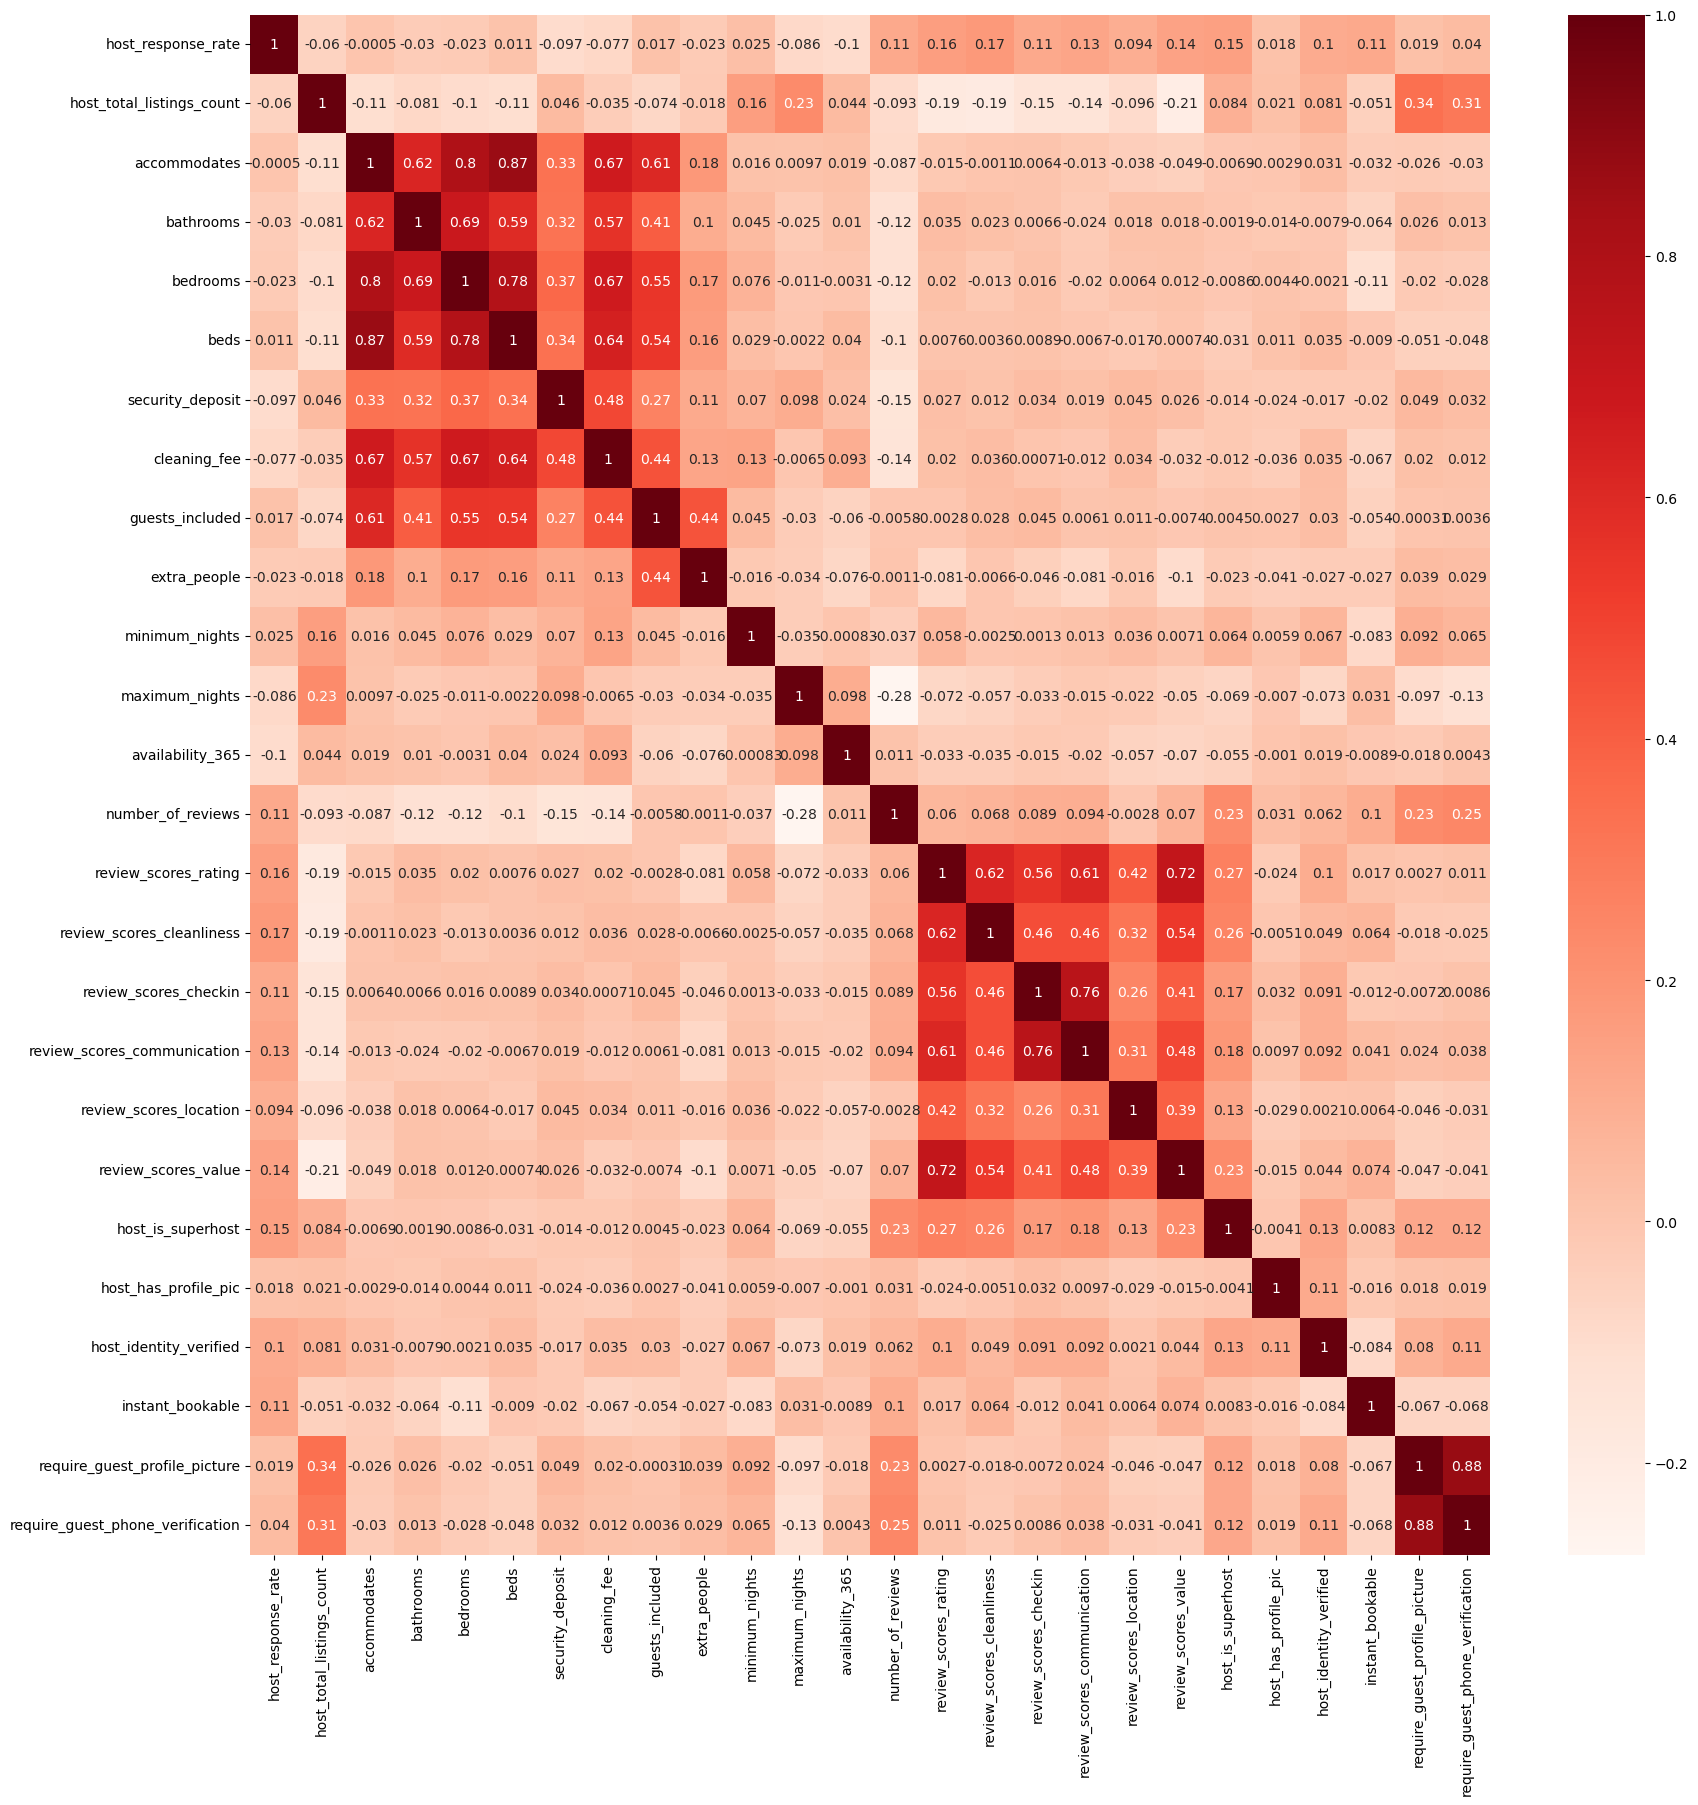

In [64]:
try:
    import seaborn as sns
except:
    !pip install seaborn
    import seaborn as sns
    
import matplotlib.pyplot as plt

combined_features = numerical_features + binary_features

features_selection_df = airbnb_features_df[combined_features]


plt.figure(figsize=(20,20))
cor = features_selection_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Feature Reduction

In [65]:
# Let's run ablation tests on our best model
# You could choose any model to do this test
import numpy as numpy

best_model = RandomForestRegressor()

feature_names = features_selection_df.columns

# Let's maintain an accuracy dictionary

accuracy_drop_log = {"No ablation":0}

for i in range(len(feature_names)):
    # we are going to drop one feature at a time
    feature_name = feature_names[i]
    print (f"Removing feature {feature_name}")
    
    # Remmeber? We have the train + valid data in the above section?
    # We just remove the feature by not selecting the column from the index i

    x_ablated = numpy.delete(_x,i,axis=1) # axis = 1 means columns
    
    cv_scores = cross_val_score(best_model,x_ablated,_y.flatten(), cv=k, n_jobs=4)
    average_cv_score = cv_scores.mean()
    print (f"Mean cross validation accuracy = {average_cv_score}")
    accuracy_drop_log[feature_name] = best_model_valid_accuracy-average_cv_score

Removing feature host_response_rate
Mean cross validation accuracy = 0.5970586432280014
Removing feature host_total_listings_count
Mean cross validation accuracy = 0.6084429495188612
Removing feature accommodates
Mean cross validation accuracy = 0.6056828213768514
Removing feature bathrooms
Mean cross validation accuracy = 0.6013933850611951
Removing feature bedrooms
Mean cross validation accuracy = 0.6030385774857563
Removing feature beds
Mean cross validation accuracy = 0.5985667782655328
Removing feature security_deposit
Mean cross validation accuracy = 0.5886048703711848
Removing feature cleaning_fee
Mean cross validation accuracy = 0.5945977123625033
Removing feature guests_included
Mean cross validation accuracy = 0.5990265789215452
Removing feature extra_people
Mean cross validation accuracy = 0.581888512949931
Removing feature minimum_nights
Mean cross validation accuracy = 0.6222021625245804
Removing feature maximum_nights
Mean cross validation accuracy = 0.5935746767505587
Re

In [66]:
def criteria(l):
    return l[1]

sorted_accs =  sorted(accuracy_drop_log.items(),key=criteria, reverse=True)

print (f"Features are ranked from best to worst (based on how removing them impacts the accuracy of {best_model_name})")
print (f"**************************************")

i=1
for entry in sorted_accs:
    feature_name = entry[0]
    acc_drop = entry[1]
    
    # We do not want to print "No ablation"
    if feature_name != "No ablation":
        print (f"Feature {i}.{feature_name}, drop in acc {acc_drop}")
        i=i+1


Features are ranked from best to worst (based on how removing them impacts the accuracy of RFR)
**************************************
Feature 1.extra_people, drop in acc 0.013654854262979521
Feature 2.security_deposit, drop in acc 0.006938496841725761
Feature 3.review_scores_communication, drop in acc 0.0045153757071604295
Feature 4.number_of_reviews, drop in acc 0.002153578116710131
Feature 5.maximum_nights, drop in acc 0.0019686904623518187
Feature 6.cleaning_fee, drop in acc 0.0009456548504073181
Feature 7.review_scores_rating, drop in acc 0.0007675576620851388
Feature 8.host_response_rate, drop in acc -0.0015152760150908273
Feature 9.beds, drop in acc -0.0030234110526222713
Feature 10.guests_included, drop in acc -0.003483211708634637
Feature 11.availability_365, drop in acc -0.004475217901252937
Feature 12.review_scores_location, drop in acc -0.004534929493419604
Feature 13.bathrooms, drop in acc -0.005850017848284539
Feature 14.review_scores_checkin, drop in acc -0.0065720966199

In [67]:
reduced_airbnb_features = [ "host_response_rate", "host_total_listings_count", "bathrooms",
                      "bedrooms", "beds", "security_deposit", "cleaning_fee", "guests_included",
                      "extra_people", "minimum_nights", "maximum_nights", "availability_365", "number_of_reviews",
                      "review_scores_rating", "review_scores_location",  
                        "host_is_superhost", "host_has_profile_pic", "host_identity_verified",
                       "instant_bookable", "require_guest_profile_picture", "require_guest_phone_verification"]


reduced_airbnb_features_df = airbnb_features_df[reduced_airbnb_features]

combined_reduced_airbnb_features_df = pd.concat([reduced_airbnb_features_df, categorical_features_df], axis=1)

In [68]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Select categorical features for one-hot encoding
categorical_features = ["host_response_time","cancellation_policy"]

# Loop through each categorical feature and apply one-hot encoding
for feature in categorical_features:
    # Convert the feature to a list
    feature_to_list = combined_reduced_airbnb_features_df[feature].to_list()
    
    feature_to_list_of_lists = []

    for value in feature_to_list:
        feature_to_list_of_lists.append([value])
    
    # Create an instance of OneHotEncoder
    encoder = OneHotEncoder()
    
    # Fit and transform the feature
    encoder.fit(feature_to_list_of_lists)
    
    # Now transform each example in our data into 1-hot form
    features_transformed = encoder.transform(feature_to_list_of_lists)
    
    # Transform the result object into a matrix
    features_transformed = features_transformed.toarray()
    
    # create a dataframe back from the array
    features_transformed_df = pd.DataFrame(features_transformed)
    
    # Now concatenate this feature back to the original dataframe 
    combined_reduced_airbnb_features_df.reset_index(drop=True, inplace=True)
    features_transformed_df.reset_index(drop=True, inplace=True)

    combined_reduced_airbnb_features_df = pd.concat([combined_reduced_airbnb_features_df,features_transformed_df], axis=1)
    
    # We don't need actor1_name now since we have already transformed it
    combined_reduced_airbnb_features_df = combined_reduced_airbnb_features_df.drop(columns=[feature], axis=1)

combined_reduced_airbnb_features_df = combined_reduced_airbnb_features_df.dropna()

combined_reduced_airbnb_features_df.head()

,host_response_rate,host_total_listings_count,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,...,require_guest_phone_verification,0,1,2,3,4,0,1,2,3
0,0.975904,0.060241,0.222222,0.142857,0.000000,0.002079,0.118644,0.076923,0.00,0.033333,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.602410,0.012048,1.000000,0.714286,0.428571,0.376299,1.000000,0.769231,0.10,0.100000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.000000,0.012048,0.444444,0.428571,0.142857,0.251559,0.406780,0.461538,0.06,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.000000,0.048193,0.222222,0.142857,0.000000,0.022869,0.067797,0.076923,0.00,0.033333,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.975904,0.060241,0.222222,0.142857,0.000000,0.002079,0.118644,0.076923,0.00,0.033333,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [69]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

DTR = DecisionTreeRegressor()
SVR = SVR()
RFR = RandomForestRegressor()
MLR = MLPRegressor()
LR = LinearRegression() 

all_models = {"DTR": DTR,
              "SVR": SVR,
              "RFR": RFR,
              "MLR": MLR,
              "LR": LR}  # Added LR to the dictionary of all models

print(f"We are working with classifiers {all_models.keys()}")

# First extract our test data and store it in x_test, y_test
features = combined_reduced_airbnb_features_df.to_numpy()
labels = airbnb_label_df.to_numpy()
_x, x_test, _y, y_test = train_test_split(features, labels, test_size=0.10, random_state=42)

k = 5  # 5-fold

# We can use sklearn's cross validation score directly
# We can speed up training using n_jobs parameter which specifies how many cpu_cores to use

best_model_name = ""
best_model_valid_accuracy = 0
best_model = None

for model_name in all_models.keys():
    model = all_models[model_name]
    cv_scores = cross_val_score(model, _x, _y.flatten(), cv=k, n_jobs=4)
    average_cv_score = cv_scores.mean()
    print(f"Mean cross validation accuracy for model {model_name} = {average_cv_score}")

    if average_cv_score > best_model_valid_accuracy:
        best_model_name = model_name
        best_model_valid_accuracy = average_cv_score
        best_model = model

print(f"Best model is {best_model_name} with {k}-fold accuracy of {best_model_valid_accuracy}")

We are working with classifiers dict_keys(['DTR', 'SVR', 'RFR', 'MLR', 'LR'])
Mean cross validation accuracy for model DTR = 0.3478573754308415
Mean cross validation accuracy for model SVR = 0.009865005958688621
Mean cross validation accuracy for model RFR = 0.5805005953855876


/Users/jin/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jin/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jin/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jin/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.wa

Mean cross validation accuracy for model MLR = 0.29082545795318193
Mean cross validation accuracy for model LR = 0.5364587970813912
Best model is RFR with 5-fold accuracy of 0.5805005953855876


/Users/jin/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
